<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/p93_combined_power_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("/content/energy_production project 93.csv")

In [3]:
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [4]:
data.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [8]:
data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


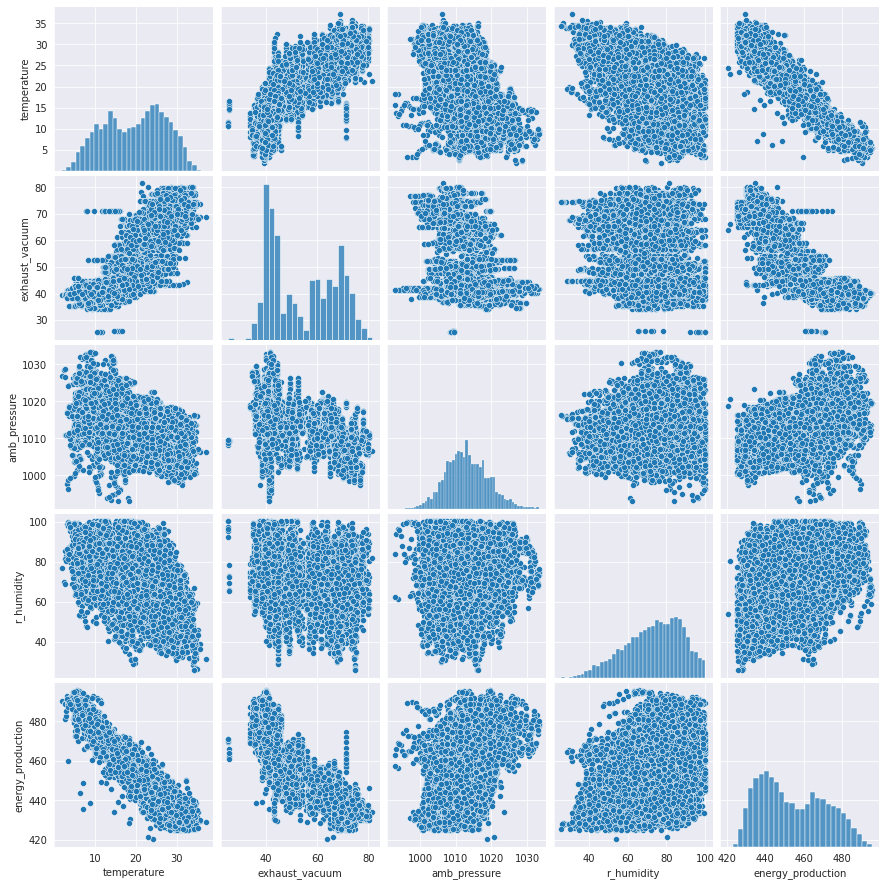

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [10]:
data[data.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [11]:
data[data.duplicated()].shape

(41, 5)

In [12]:
# clean All duplicated value
data_1=data.drop_duplicates().reset_index(drop=True)
data_1.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [13]:
data_1.shape

(9527, 5)

In [14]:
corelation=data_1.corr()
corelation

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


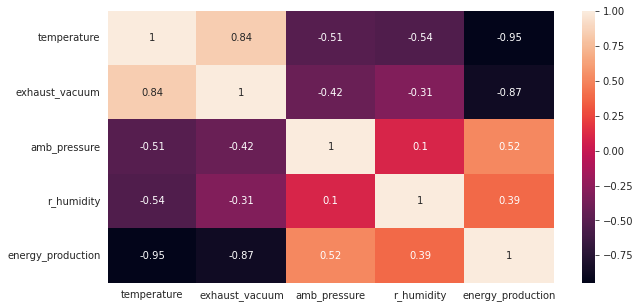

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(corelation,annot=True)
plt.show()

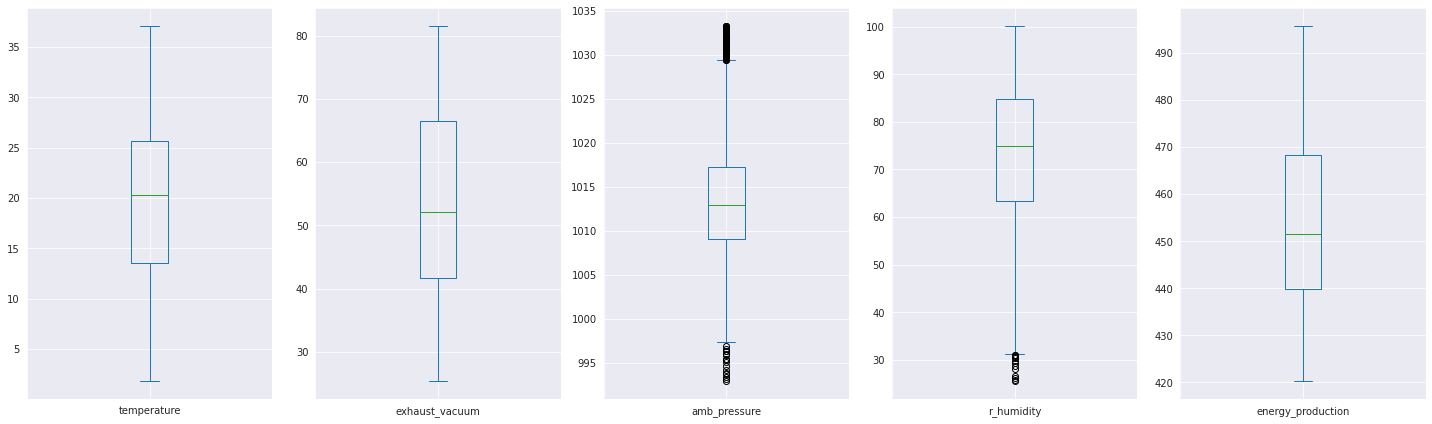

In [16]:
data_1.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

In [17]:
#outlier remove
data_1.drop(data_1.index[data_1['amb_pressure']>1029], inplace=True)
data_1.drop(data_1.index[data_1['amb_pressure']<997], inplace=True)
data_1.drop(data_1.index[data_1['r_humidity']<31], inplace=True)

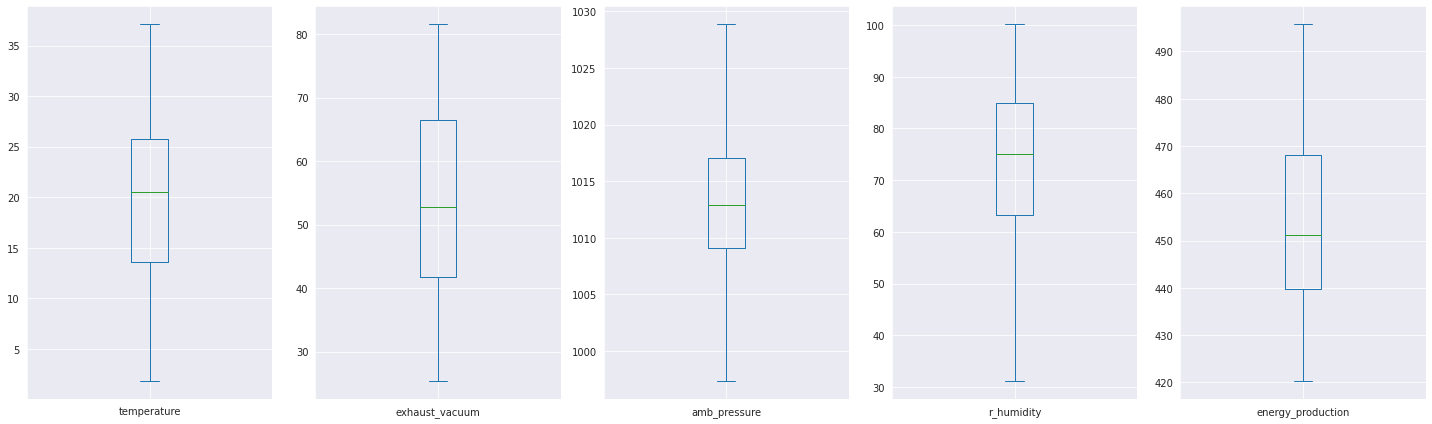

In [18]:
data_1.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

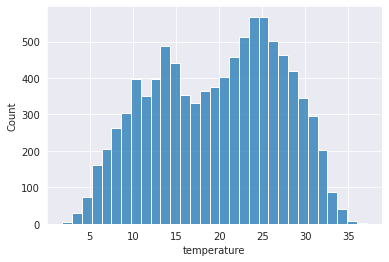

In [24]:
# histogram
#temperature and amb_pressure are normally distributed
#r_humidity has postively left skewd
sns.histplot(data_1['temperature'])
plt.show()

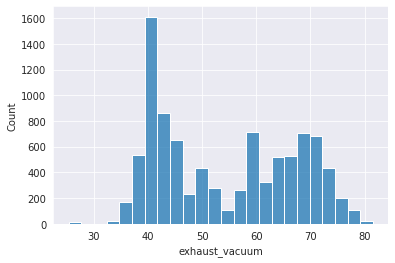

In [20]:
sns.histplot(data_1['exhaust_vacuum'])
plt.show()

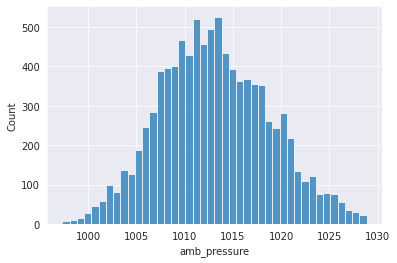

In [21]:
sns.histplot(data_1['amb_pressure'])
plt.show()

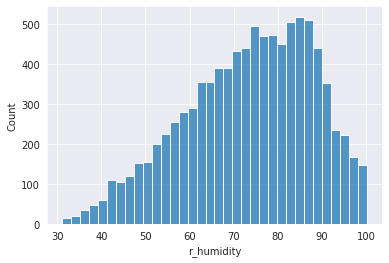

In [22]:
sns.histplot(data_1['r_humidity'])
plt.show()

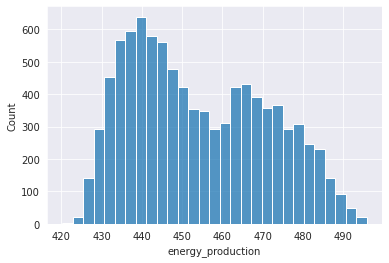

In [23]:
sns.histplot(data_1['energy_production'])
plt.show()

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
!pip install klib
import klib

     |████████████████████████████████| 133 kB 18.1 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [33]:
klib.missingval_plot(data_1)

No missing values found in the dataset.


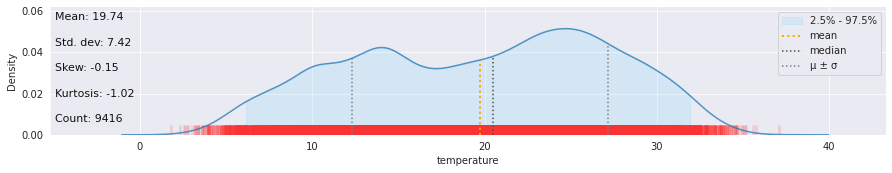

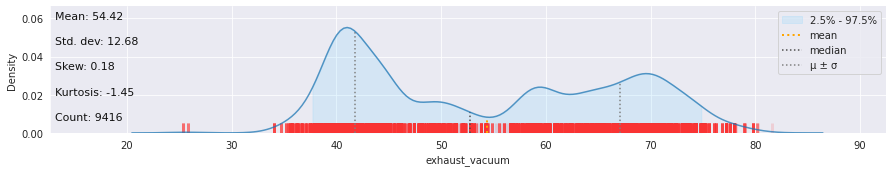

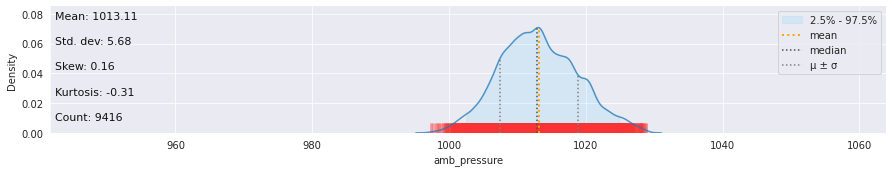

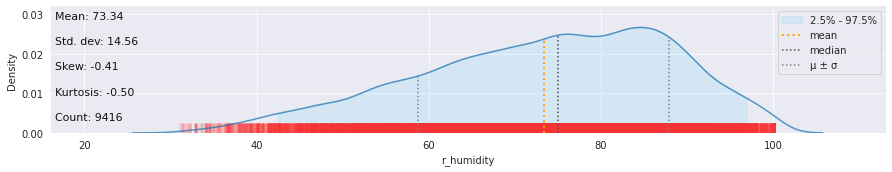

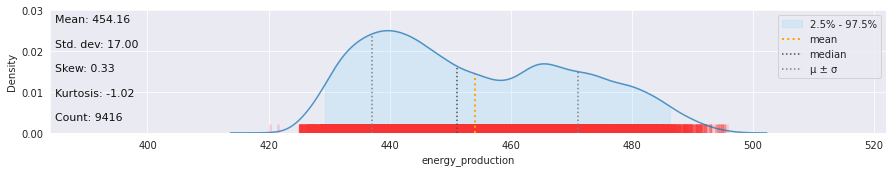

In [34]:
klib.dist_plot(data_1)

In [35]:
model = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity	',data=data_1).fit()

In [36]:
model.params

Intercept         443.040546
temperature        -1.970462
exhaust_vacuum     -0.236374
amb_pressure        0.073497
r_humidity         -0.158025
dtype: float64

In [37]:
print(model.tvalues, '\n', model.pvalues)

Intercept          43.172127
temperature      -127.815380
exhaust_vacuum    -32.232718
amb_pressure        7.374679
r_humidity        -37.465038
dtype: float64 
 Intercept          0.000000e+00
temperature        0.000000e+00
exhaust_vacuum    2.615329e-216
amb_pressure       1.786645e-13
r_humidity        1.817988e-286
dtype: float64


In [38]:
(model.rsquared,model.rsquared_adj)

(0.9277406256075342, 0.9277099128780082)

In [39]:
(model.rsquared,model.aic)

(0.9277406256075342, 55340.37538335864)

In [40]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

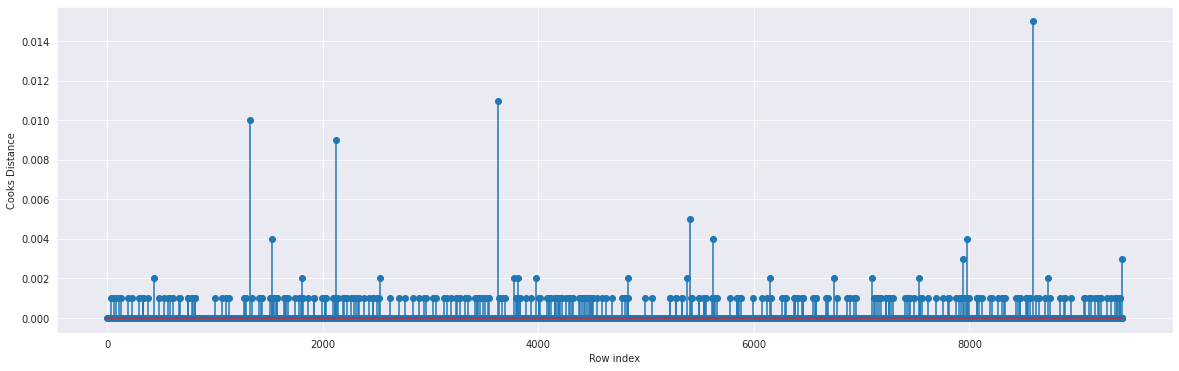

In [61]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [62]:
(np.argmax(c_V),np.max(c_V))

(8589, 0.014966981413698833)

In [63]:
data_2=data_1.drop(data_1.index[[8589,3899]],axis=0)

In [64]:
data_3=data_2.reset_index()

In [72]:
data_4=data_3.drop(['index'],axis=1)
print(data_4)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9409        17.10           49.69       1005.53       81.82             457.32
9410        24.73           65.34       1015.42       52.80             446.92
9411        30.44           56.24       1005.19       56.24             429.34
9412        23.00           66.05       1020.61       80.29             421.57
9413        17.75           49.25       1020.86       63.67             454.41

[9414 rows x 5 columns]


In [73]:


model1 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_4).fit()

In [74]:
(model1.rsquared,model1.aic)

(0.9284160912093143, 55237.78327934805)

In [78]:
model1_influence_V = model1.get_influence()
(c_V, _) = model1_influence_V.cooks_distance

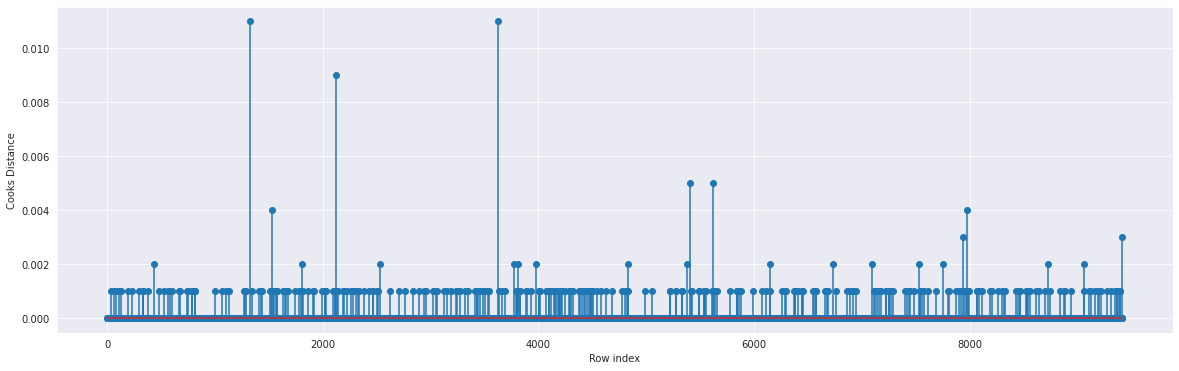

In [87]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [80]:
(np.argmax(c_V),np.max(c_V))

(3623, 0.010735524755575042)

In [99]:
data_5=data_4.drop(data_4.index[[3623,1321,2119]],axis=0)

In [100]:
data_6=data_5.reset_index()

In [101]:
data_7=data_6.drop(['index'],axis=1)
print(data_7)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9406        17.10           49.69       1005.53       81.82             457.32
9407        24.73           65.34       1015.42       52.80             446.92
9408        30.44           56.24       1005.19       56.24             429.34
9409        23.00           66.05       1020.61       80.29             421.57
9410        17.75           49.25       1020.86       63.67             454.41

[9411 rows x 5 columns]


In [102]:
model2 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_7).fit()

In [103]:
(model2.rsquared,model2.aic)

(0.9292465633107762, 55111.57006392056)

In [106]:
model2_influence_V = model2.get_influence()
(c_V, _) = model2_influence_V.cooks_distance

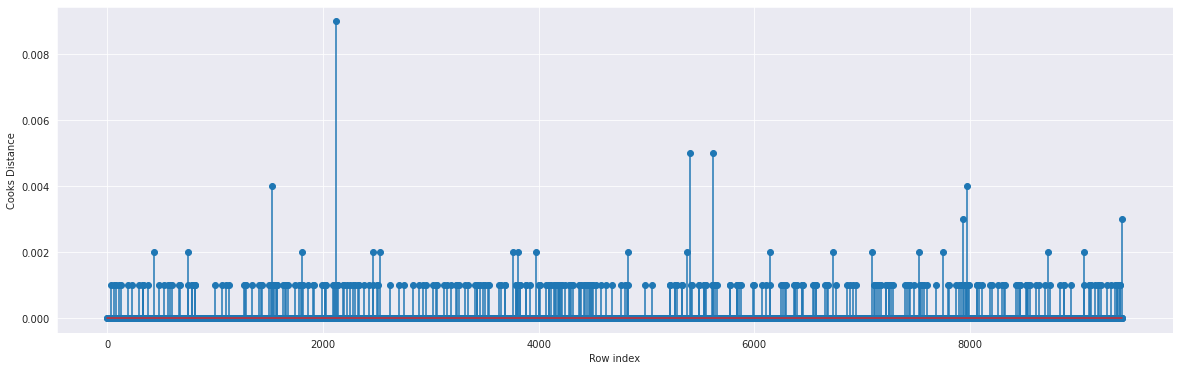

In [105]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [107]:
(np.argmax(c_V),np.max(c_V))

(2118, 0.009360058932804378)

In [116]:
data_8=data_7.drop(data_7.index[[5404,2118]],axis=0)

In [117]:
data_9=data_8.reset_index()

In [118]:
data_10=data_9.drop(['index'],axis=1)
print(data_10)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9404        17.10           49.69       1005.53       81.82             457.32
9405        24.73           65.34       1015.42       52.80             446.92
9406        30.44           56.24       1005.19       56.24             429.34
9407        23.00           66.05       1020.61       80.29             421.57
9408        17.75           49.25       1020.86       63.67             454.41

[9409 rows x 5 columns]


In [119]:
model3 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_10).fit()

In [120]:
(model3.rsquared,model3.aic)

(0.929923022368853, 55009.97776104274)

In [121]:
model3_influence_V = model3.get_influence()
(c_V, _) = model3_influence_V.cooks_distance

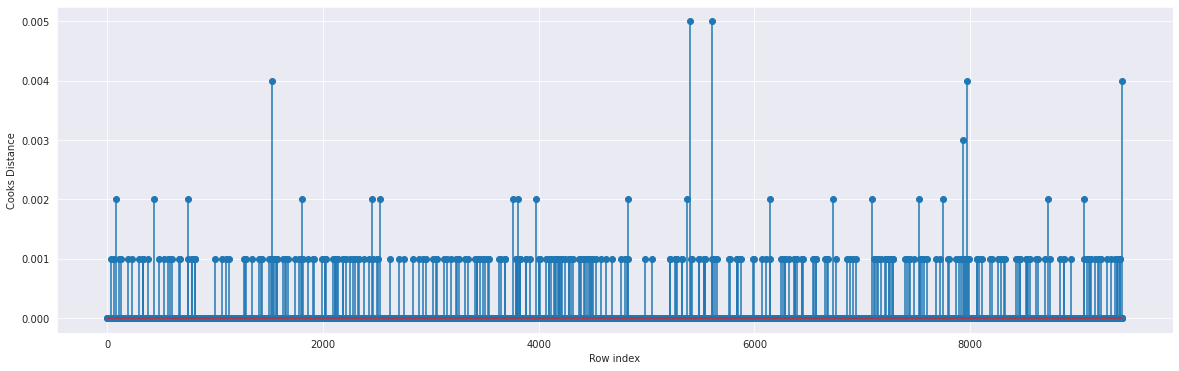

In [122]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_10)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [123]:
(np.argmax(c_V),np.max(c_V))

(5404, 0.005361971998318557)

In [132]:
data_11=data_10.drop(data_10.index[[5404,5611]],axis=0)

In [133]:
data_12=data_11.reset_index()

In [134]:
data_13=data_12.drop(['index'],axis=1)
print(data_13)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9402        17.10           49.69       1005.53       81.82             457.32
9403        24.73           65.34       1015.42       52.80             446.92
9404        30.44           56.24       1005.19       56.24             429.34
9405        23.00           66.05       1020.61       80.29             421.57
9406        17.75           49.25       1020.86       63.67             454.41

[9407 rows x 5 columns]


In [135]:
model4 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_13).fit()

In [136]:
(model4.rsquared,model4.aic)

(0.9302832209515023, 54951.537782883104)

In [137]:
model4_influence_V = model4.get_influence()
(c_V, _) = model4_influence_V.cooks_distance

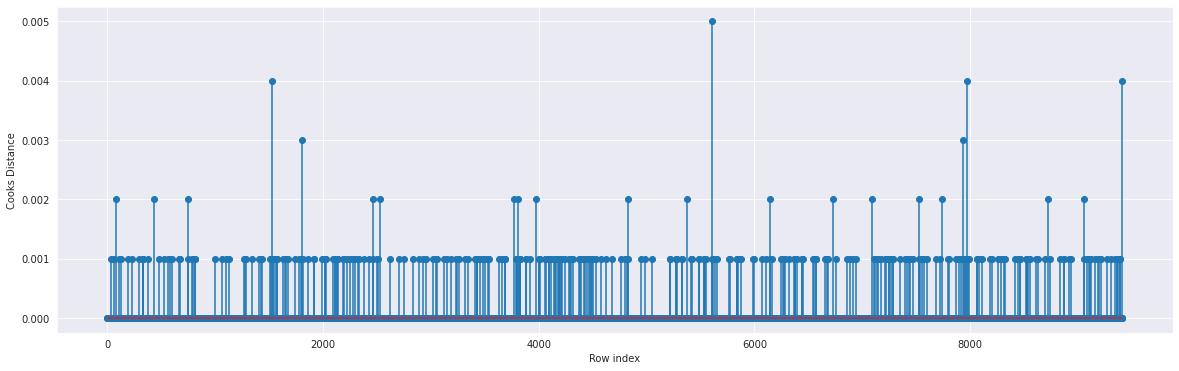

In [138]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_13)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [139]:
(np.argmax(c_V),np.max(c_V))

(5610, 0.004663360198794403)

In [149]:
data_14=data_13.drop(data_13.index[[5610,1528]],axis=0)

In [150]:
data_15=data_14.reset_index()

In [151]:
data_16=data_15.drop(['index'],axis=1)
print(data_16)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9400        17.10           49.69       1005.53       81.82             457.32
9401        24.73           65.34       1015.42       52.80             446.92
9402        30.44           56.24       1005.19       56.24             429.34
9403        23.00           66.05       1020.61       80.29             421.57
9404        17.75           49.25       1020.86       63.67             454.41

[9405 rows x 5 columns]


In [152]:
model5 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_16).fit()

In [153]:
(model5.rsquared,model5.aic)

(0.9308735336845694, 54859.719247659625)

In [154]:
model5_influence_V = model5.get_influence()
(c_V, _) = model5_influence_V.cooks_distance

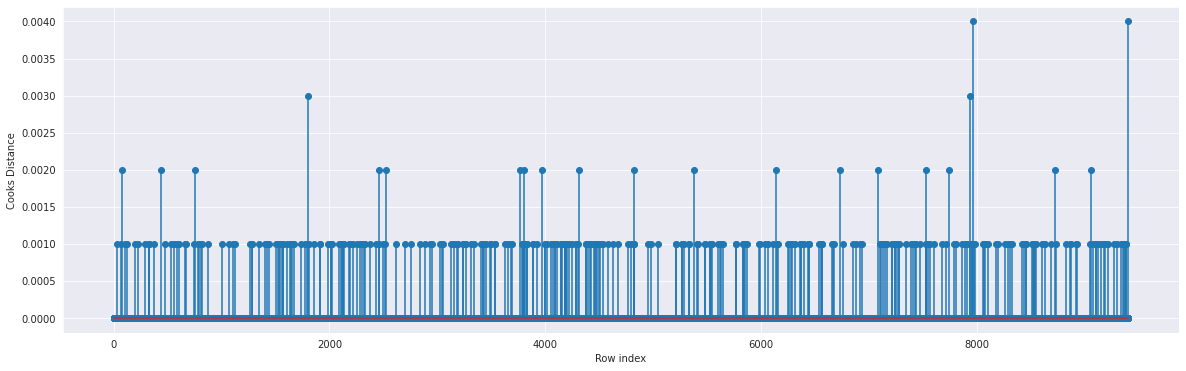

In [155]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_16)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [156]:
(np.argmax(c_V),np.max(c_V))

(7965, 0.0036654257404173276)

In [166]:
data_17=data_16.drop(data_16.index[[7965,9402]],axis=0)

In [167]:
data_18=data_17.reset_index()

In [168]:
data_19=data_18.drop(['index'],axis=1)
print(data_19)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9398        21.85           63.86       1020.16       68.84             445.62
9399        17.10           49.69       1005.53       81.82             457.32
9400        24.73           65.34       1015.42       52.80             446.92
9401        23.00           66.05       1020.61       80.29             421.57
9402        17.75           49.25       1020.86       63.67             454.41

[9403 rows x 5 columns]


In [169]:
model6 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_19).fit()

In [170]:
(model6.rsquared,model6.aic)

(0.9310927808505202, 54814.07128367045)

In [171]:
model6_influence_V = model6.get_influence()
(c_V, _) = model6_influence_V.cooks_distance

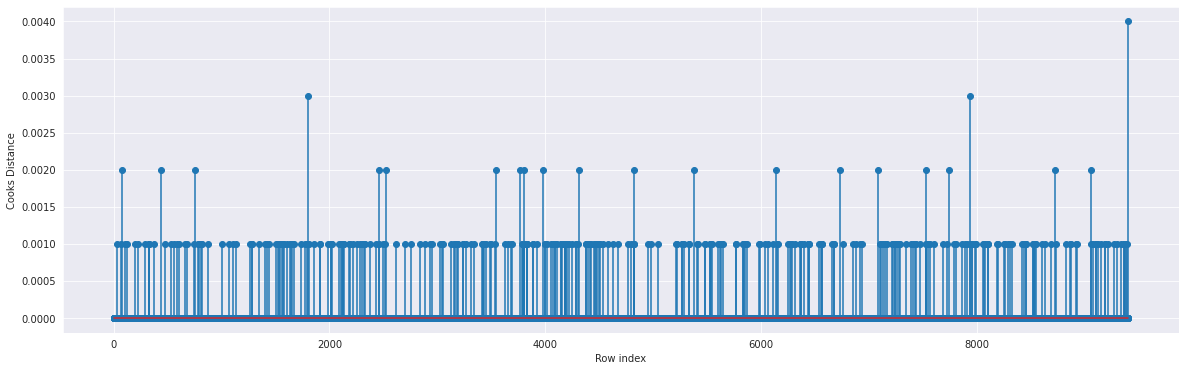

In [172]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_19)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [173]:
(np.argmax(c_V),np.max(c_V))

(9401, 0.003602737911167791)

In [182]:
data_20=data_19.drop(data_19.index[[9401,7934]],axis=0)

In [183]:
data_21=data_20.reset_index()

In [184]:
data_22=data_21.drop(['index'],axis=1)
print(data_22)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9396        21.90           63.13       1011.54       81.83             447.40
9397        21.85           63.86       1020.16       68.84             445.62
9398        17.10           49.69       1005.53       81.82             457.32
9399        24.73           65.34       1015.42       52.80             446.92
9400        17.75           49.25       1020.86       63.67             454.41

[9401 rows x 5 columns]


In [185]:
model7 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_22).fit()

In [186]:
(model7.rsquared,model7.aic)

(0.93151208251926, 54741.10110350167)

In [187]:
model7_influence_V = model7.get_influence()
(c_V, _) = model7_influence_V.cooks_distance

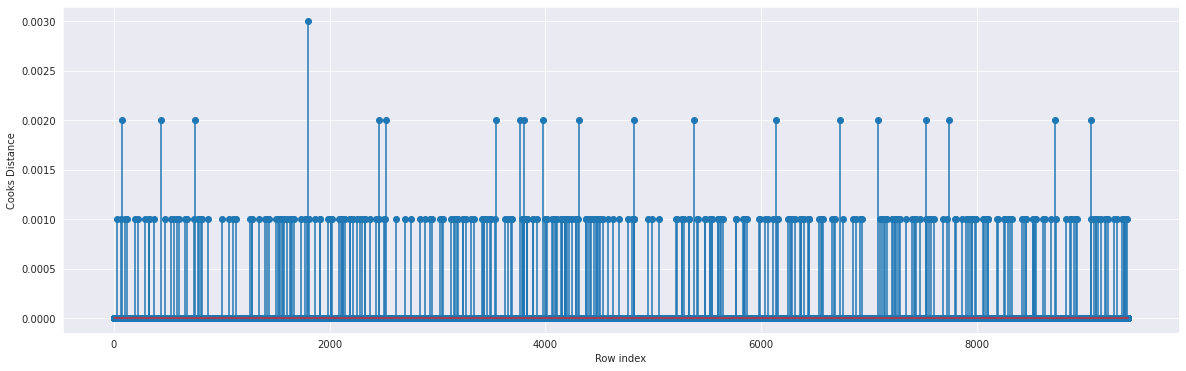

In [188]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_22)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [189]:
(np.argmax(c_V),np.max(c_V))

(1801, 0.002552236753550457)

In [206]:
data_23=data_22.drop(data_22.index[[1801,3972]],axis=0)

In [207]:
data_24=data_23.reset_index()

In [208]:
data_25=data_24.drop(['index'],axis=1)
print(data_25)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9394        21.90           63.13       1011.54       81.83             447.40
9395        21.85           63.86       1020.16       68.84             445.62
9396        17.10           49.69       1005.53       81.82             457.32
9397        24.73           65.34       1015.42       52.80             446.92
9398        17.75           49.25       1020.86       63.67             454.41

[9399 rows x 5 columns]


In [209]:
model8 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=data_25).fit()

In [210]:
(model8.rsquared,model8.aic)

(0.9316229268142439, 54714.79918983684)

In [211]:
model8_influence_V = model8.get_influence()
(c_V, _) = model8_influence_V.cooks_distance

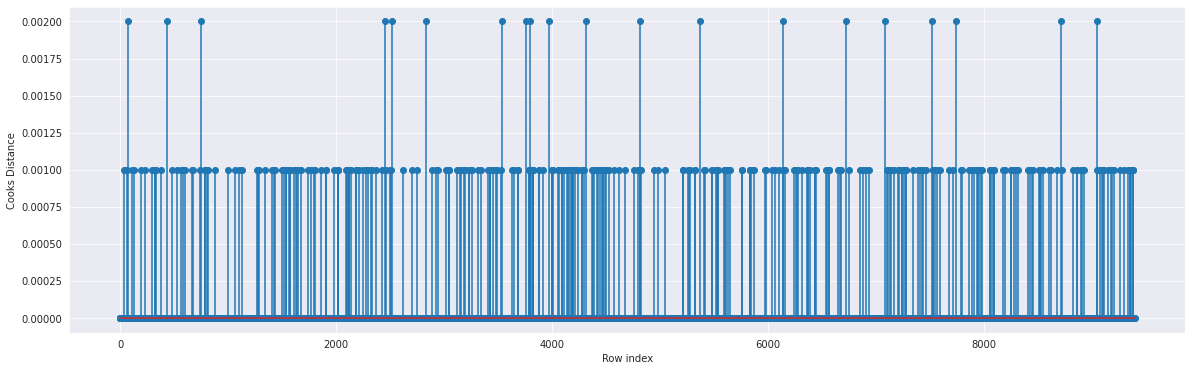

In [212]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(data_25)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [213]:
(np.argmax(c_V),np.max(c_V))

(3972, 0.002452237684598296)